## Exercise 2.02: Forest Fire Size and Temperature Analysis

In this activity, we will use pandas features to derive some insights from a forest fire dataset. We will get the mean size of forest fires, what the largest recorded fire in our dataset is, and whether the amount of forest fires grows proportionally to the temperature in each month.

#### Loading the dataset

In [26]:
# importing the necessary dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#1 load the "forestfires.csv" dataset

dataset = pd.read_csv('C:/Users/user/Desktop/ITD112/Laboratory_Exercise_2/Datasets/forestfires.csv', index_col=0)

In [4]:
dataset

,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,,,,,,,,,,,,
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16


In [5]:
#2 looking at the first two rows of the dataset
dataset[0:2]

,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,,,,,,,,,,,,
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0


The dataset contains: 
- X - x-axis spatial coordinate within the Montesinho park map: 1 to 9 
- Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9 
- **month - month of the year: 'jan' to 'dec'**
- day - day of the week: 'mon' to 'sun' 
- FFMC - FFMC index from the FWI system: 18.7 to 96.20 
- DMC - DMC index from the FWI system: 1.1 to 291.3 
- DC - DC index from the FWI system: 7.9 to 860.6 
- ISI - ISI index from the FWI system: 0.0 to 56.10 
- **temp - temperature in Celsius degrees: 2.2 to 33.30**
- RH - relative humidity in %: 15.0 to 100 
- wind - wind speed in km/h: 0.40 to 9.40 
- rain - outside rain in mm/m2 : 0.0 to 6.4 
- **area - the burned area of the forest (in ha): 0.00 to 1090.84**


**Note:**   
The fields that we'll be working with are highlighted in the listing.

---

#### Getting insights into the sizes of forest fires.

When looking at the first two rows of our dataset we can already see that it contains entries in which the area is 0.    
For this first task we only care about fires that have an area of more than 0.   

Create a new dataset that only contains the entries with an area value of > 0.

In [16]:
#3 filter the dataset for rows that have an area > 0
filtered_dataset = dataset[dataset['area'] > 0]
print(filtered_dataset)

    Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
X                                                                      
9   9   jul  tue  85.8   48.3  313.4   3.9  18.0  42   2.7   0.0   0.36
1   4   sep  tue  91.0  129.5  692.6   7.0  21.7  38   2.2   0.0   0.43
2   5   sep  mon  90.9  126.5  686.5   7.0  21.9  39   1.8   0.0   0.47
1   2   aug  wed  95.5   99.9  513.3  13.2  23.3  31   4.5   0.0   0.55
8   6   aug  fri  90.1  108.0  529.8  12.5  21.2  51   8.9   0.0   0.61
.. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
5   4   aug  fri  91.0  166.9  752.6   7.1  21.1  71   7.6   1.4   2.17
6   5   aug  fri  91.0  166.9  752.6   7.1  18.2  62   5.4   0.0   0.43
4   3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
2   4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
7   4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16

[270 rows x 12 columns]


After filtering out the zero area entries, we can simply use the `mean` method of pandas to get the mean area size of the forest fires for the filtered down dataset not containing zero area sizes.

Get the mean value for the `area` column of out filtered dataset.

In [17]:
#4 get the mean value for the area column
mean_area = filtered_dataset['area'].mean()
print(mean_area)

24.600185185185182


In addition to that, looking at the largest and smallest non-zero area can help us understand the range of possible area sizes.
Let's get more insights into that.

- Use the `min` and `max` methods to see the smallest and largest area that has been affected by a forest fire.
- Use the `std` method to get insights into how much variation there is in our dataset.

In [18]:
#5 get the smallest area value from our dataset
smallest_area = filtered_dataset['area'].min()
print(smallest_area)

0.09


In [19]:
#6 get the largest area value from our dataset
largest_area = filtered_dataset['area'].max()
print(largest_area)

1090.84


In [20]:
#7 get the standard deviation of values in our dataset
std_deviation = filtered_dataset['area'].std()
print(std_deviation)

86.50163460412126


The largest value is much larger than our mean.   
The standard deviation also is quite large which indicates that the difference between our mean and the "middle value" will be quite high.

Let's look at the last 20 values of our sorted dataset to see if we have more than one very large value.   
Sort the filtered dataset by the `area` column and output the last 20 entries from it.

In [21]:
#8 sorting the filtered dataset and printing the last 20 elements 
sorted_dataset = filtered_dataset.sort_values(by='area', ascending=False)
last_20_entries = sorted_dataset.tail(20)
print(last_20_entries)

   Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  area
X                                                                    
2  4   aug  wed  92.2   91.6  503.6   9.6  20.7  70   2.2   0.0  0.75
1  3   sep  sat  91.2   94.3  744.4   8.4  22.3  48   4.0   0.0  0.72
1  2   jul  sat  90.0   51.3  296.3   8.7  16.6  53   5.4   0.0  0.71
8  5   aug  wed  93.1  157.3  666.7  13.5  26.8  25   3.1   0.0  0.68
4  3   aug  sat  94.2  117.2  581.1  11.0  21.4  44   2.7   0.0  0.68
8  6   aug  fri  90.1  108.0  529.8  12.5  21.2  51   8.9   0.0  0.61
1  2   aug  wed  95.5   99.9  513.3  13.2  23.3  31   4.5   0.0  0.55
8  6   aug  mon  92.1  207.0  672.6   8.2  26.8  35   1.3   0.0  0.54
2  2   aug  tue  92.1  152.6  658.2  14.3  21.8  56   3.1   0.0  0.52
7  4   sep  fri  88.2   55.2  732.3  11.6  15.2  64   3.1   0.0  0.52
2  5   sep  mon  90.9  126.5  686.5   7.0  21.9  39   1.8   0.0  0.47
6  5   aug  fri  91.0  166.9  752.6   7.1  18.2  62   5.4   0.0  0.43
1  4   sep  tue  91.

As we can see here, only 11 out of the 270 rows contain values that are larger than 100.   
After 20 values we are close to the area value of 60. 

Let's imagine our dataset contained only 1 or 2 values that were much higher than the other ones, e.g. an area size value of 10254.91. Simply by observing the dataset, this feels like there might have been an error on adding this to the dataset.   
In a smaller dataset, the mean value would get heavily distored by this one entry. A more stable value to use in such a case is the median value of the dataset.

Get the median value for the ´area´ column.

In [22]:
#9 calculate the median value for the area column
median_area = filtered_dataset['area'].median()
print(median_area)

6.37


**Note:**   
Remember that the median is not the same as then mean of your dataset. While the median is simple the "value in the middle", the mean is much more prone to distortion by outliers.

---

#### Finding the month with the most forest fires

In this second task we want to quickly see which months have the most forest fires and whether or not the temperature has a direct connection to it.

Get a list of month values that are present in our dataset.

In [23]:
#10 get a list of month values from the dataset
unique_months = dataset['month'].unique()
print(unique_months)

['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']


In addition to the unique values we also want use the shape element of our dataset to determine how many rows it has.

Filter the dataset for only rows that contain the month `mar` and print the number of rows using `shape`.

In [62]:
#11 get the number of forest fires for the month of march
fires_in_march = dataset[dataset['month'] == 'mar'].shape[0]
print(fires_in_march)

54


The last step to fulfil the task is to iterate over all months, filtering our dataset for the rows containing the given month and calculating the mean temperature.

- Iterate over the months from the unique list we created
- Filter our dataset for the rows containing the given month
- Get the number of rows from `shape`
- Get the mean temperature for the given month
- Print a statement with the number of fires, mean temperature and the month

In [78]:
# 12-15
# iterate over the months list
# get number of forest fires for each month
# get mean temperature for each month
# print out number of fires and mean temperature

# Define a custom order for months
custom_month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Get a list of month values from the dataset
unique_months = dataset['month'].unique()

# Iterate over the custom order of months
for month in custom_month_order:
    if month in unique_months:
        month_data = dataset[dataset['month'] == month]
        num_fires = month_data.shape[0]
        mean_temp = month_data['temp'].mean()
        print(f"Month: {month}, Number of Fires: {num_fires}, Mean Temperature: {mean_temp:.2f}")


Month: jan, Number of Fires: 2, Mean Temperature: 5.25
Month: feb, Number of Fires: 20, Mean Temperature: 9.63
Month: mar, Number of Fires: 54, Mean Temperature: 13.08
Month: apr, Number of Fires: 9, Mean Temperature: 12.04
Month: may, Number of Fires: 2, Mean Temperature: 14.65
Month: jun, Number of Fires: 17, Mean Temperature: 20.49
Month: jul, Number of Fires: 32, Mean Temperature: 22.11
Month: aug, Number of Fires: 184, Mean Temperature: 21.63
Month: sep, Number of Fires: 172, Mean Temperature: 19.61
Month: oct, Number of Fires: 15, Mean Temperature: 17.09
Month: nov, Number of Fires: 1, Mean Temperature: 11.80
Month: dec, Number of Fires: 9, Mean Temperature: 4.52


# GRAPH --------------------------------------------------------------------------------------------------

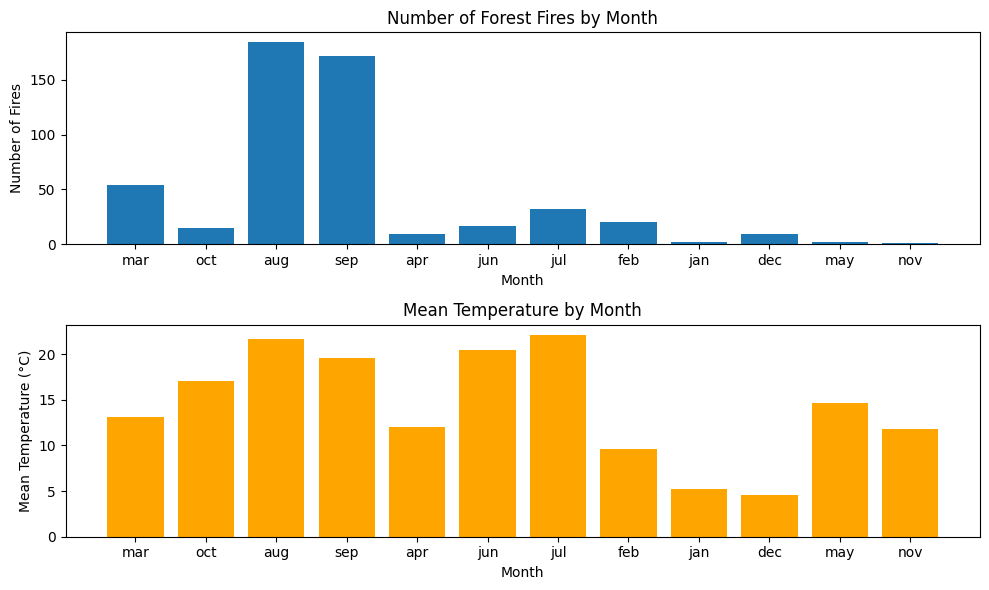

In [27]:
# Get a list of month values from the dataset
unique_months = dataset['month'].unique()

# Initialize lists to store data for the graph
num_fires_per_month = []
mean_temp_per_month = []

# Iterate over the months list, get the number of forest fires and the mean temperature, and store the data
for month in unique_months:
    month_data = dataset[dataset['month'] == month]
    num_fires = month_data.shape[0]
    mean_temp = month_data['temp'].mean()
    num_fires_per_month.append(num_fires)
    mean_temp_per_month.append(mean_temp)

# Create a bar chart with two subplots (number of fires and mean temperature)
plt.figure(figsize=(10, 6))

# Subplot for the number of fires
plt.subplot(2, 1, 1)
plt.bar(unique_months, num_fires_per_month)
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.title('Number of Forest Fires by Month')

# Subplot for the mean temperature
plt.subplot(2, 1, 2)
plt.bar(unique_months, mean_temp_per_month, color='orange')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°C)')
plt.title('Mean Temperature by Month')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined graph
plt.show()

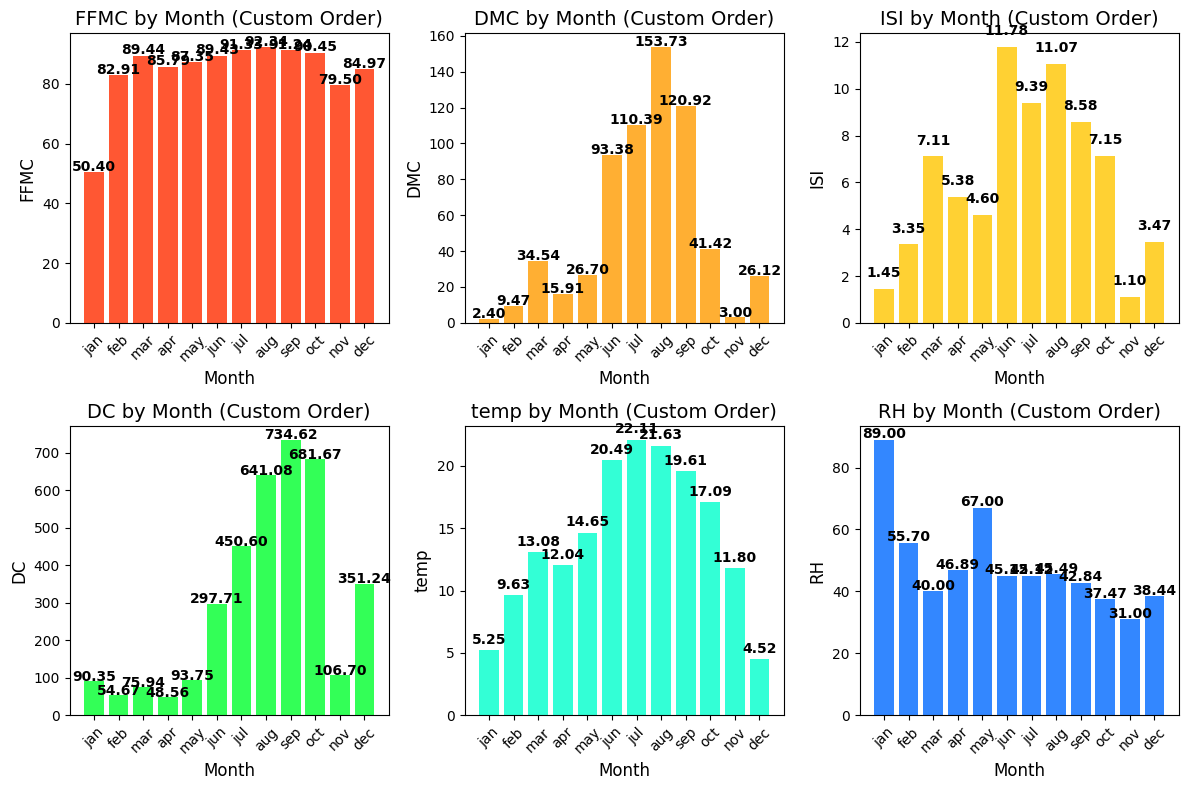

In [77]:
# Group the dataset by month and calculate the mean FFMC, DMC, ISI, DC, temp, RH, wind, and rain for each month
all_vars_by_month = dataset.groupby('month')[['FFMC', 'DMC', 'ISI', 'DC', 'temp', 'RH']].mean().reindex(custom_month_order).reset_index()

# Create a beautiful color palette
color_palette = ['#FF5733', '#FFAF33', '#FFD133', '#33FF57', '#33FFD6', '#3387FF', '#8533FF', '#FF33AE']

# Create a figure with six subplots (two rows, three columns)
plt.figure(figsize=(12, 8))

for i, variable in enumerate(['FFMC', 'DMC', 'ISI', 'DC', 'temp', 'RH']):
    plt.subplot(2, 3, i + 1)
    plt.bar(all_vars_by_month['month'], all_vars_by_month[variable], color=color_palette[i])
    plt.xlabel('Month', fontsize=12)
    plt.ylabel(variable, fontsize=12)
    plt.title(f'{variable} by Month (Custom Order)', fontsize=14)

    # Rotate month labels for better readability
    plt.xticks(rotation=45)

    # Add numbers above each bar
    for month, value in zip(all_vars_by_month['month'], all_vars_by_month[variable]):
        plt.text(month, value + 0.5, f'{value:.2f}', ha='center', fontsize=10, fontweight='bold')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined graphs
plt.show()
